# IMPORTATION DES PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTATION DES DONNEES

In [2]:

marketing_df = pd.read_csv('marketing.csv')

In [8]:
#decription du dataFrame
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [3]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [9]:
#Resume statistiques
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


In [10]:
#Canaux Marketing utilises par l'entreprise
marketing_df['marketing_channel'].value_counts()

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

In [6]:
#En terme de proportion
marketing_df['marketing_channel'].value_counts(normalize=True)

marketing_channel
House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: proportion, dtype: float64

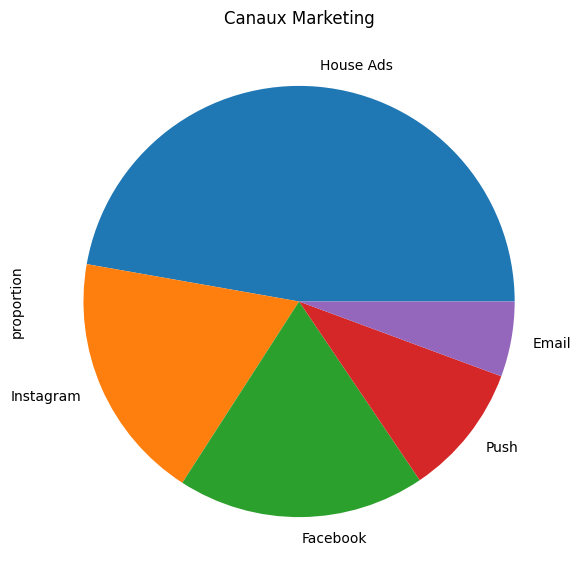

In [4]:
#Representation des canaux digitaux
plt.figure(figsize=(7,7))
marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind='pie')
plt.title("Canaux Marketing")
plt.show()

# VARIABLES DATE AU FORMAT DATETIME

In [5]:
#Changement du type de certaines colonnes
for col in ['date_served', 'date_subscribed', 'date_canceled']:
    marketing_df[col] = pd.to_datetime(marketing_df[col])

#Verification
marketing_df.dtypes    

C:\Users\Dell Pro X360\AppData\Local\Temp\ipykernel_9684\3427183966.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])
C:\Users\Dell Pro X360\AppData\Local\Temp\ipykernel_9684\3427183966.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])
C:\Users\Dell Pro X360\AppData\Local\Temp\ipykernel_9684\3427183966.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])


user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [13]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


# LE NOMBRE D'UTILISATEURS RETENUS PAR LA CAMPAGNE



In [14]:
#Nombre d'utilisateur retenu est:
marketing_df['is_retained'].sum()

1279

In [15]:
#En terme de proportion nous avons
marketing_df['is_retained'].value_counts(normalize=True)

is_retained
True     0.689116
False    0.310884
Name: proportion, dtype: float64

# CREATION DES NOUVELLES COLONNES

In [16]:
#Dictionnaire des chaines dinstinctes de souscription avec leurs codes
dict_channel = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Push':4, 'Email':5}

In [17]:
#Creation de la nouvelle colonne 'channel_code'
marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channel)

In [18]:
#Ajout d'une nouvelle colonne 'is_correct_lang'
marketing_df['is_correct_lang'] = np.where (marketing_df['language_displayed'] == marketing_df['language_preferred'], 'Yes', 'No')

In [20]:
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
channel_code                  float64
is_correct_lang                object
dtype: object

In [21]:
#Ajout de la colonne 'DoW' qui represente le jour de la semaine
marketing_df['Dow'] =  marketing_df['date_subscribed'].dt.dayofweek

In [22]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,Dow
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


In [28]:
marketing_df.describe()

,date_served,date_subscribed,date_canceled,channel_code,Dow
count,10021,1856,577,1856.000000,1856.000000
mean,2018-01-15 05:02:03.221235712,2018-01-14 02:04:08.275862016,2018-03-03 18:28:04.575389952,2.697737,2.529634
min,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-05 00:00:00,1.000000,0.000000
25%,2018-01-08 00:00:00,2018-01-07 00:00:00,2018-02-07 00:00:00,2.000000,1.000000
50%,2018-01-15 00:00:00,2018-01-15 00:00:00,2018-03-04 00:00:00,2.000000,2.000000
75%,2018-01-22 00:00:00,2018-01-19 00:00:00,2018-04-01 00:00:00,3.000000,4.000000
max,2018-01-31 00:00:00,2018-01-31 00:00:00,2018-05-09 00:00:00,5.000000,6.000000
std,NaN,NaN,NaN,1.307954,1.937900


### UTILISATEURS UNIQUES QUI VOIENT LES ANNONCES MARKETING CHAQUE JOUR

In [7]:
#Grouper les observations par la variable 'date_served' et compter le nombre d'utilisateurs(variable user_id)
daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

### VISUALISATION DE RESULTATS

Text(0.5, 1.0, "Nombre journalier d'utilisateurs regardant les annonces marketing\n")

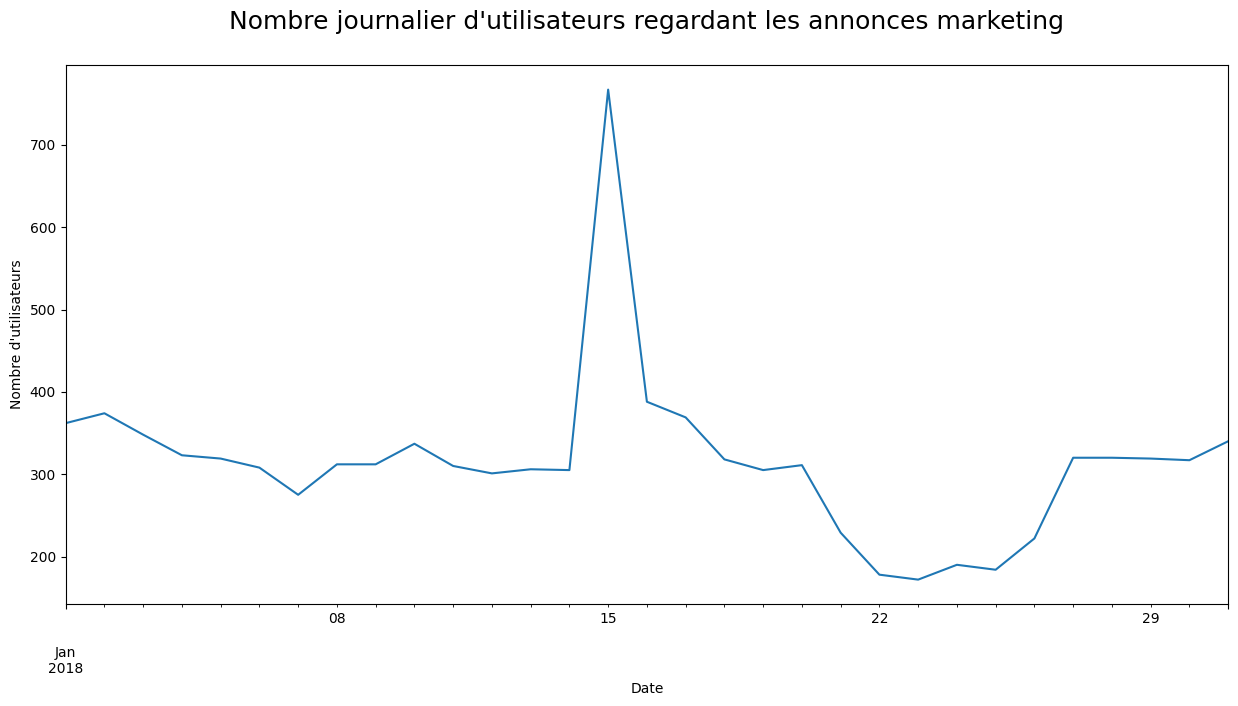

In [8]:
#visualisation
plt.figure(figsize=(15, 7))
daily_users.plot.line()
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre journalier d'utilisateurs regardant les annonces marketing\n", fontsize=18)

# INDICATEURS CLES DE PERFORMANCES

### Calculons le taux conversion total

In [9]:
# Calcul du taux de conversion total
   # Nombres d'utilisateurs uniques
n_unique_users = marketing_df['user_id'].nunique()
print("Le nombre d'utilisateurs uniques est:", n_unique_users)

   # Nombre utilisateur unique ayant souscrit au service
n_souscripteurs = marketing_df[marketing_df['converted']==True]['user_id'].nunique()
print('\n')
print("Le nombbre d'utilisateurs uniques ayant souscrit au service est", n_souscripteurs)

   # Le taux de conversion global
taux_conv_global = n_souscripteurs/n_unique_users
print('\n')
print("Le taux de convertion globale est egale", round(taux_conv_global*100, 2), '%')



Le nombre d'utilisateurs uniques est: 7309


Le nombbre d'utilisateurs uniques ayant souscrit au service est 1015


Le taux de convertion globale est egale 13.89 %


### Calculons le taux de retention

In [10]:
# Calcul du taux de retention global d'un mois
   #nombres de personnes qui sont restees abonnees
retained = marketing_df[marketing_df['is_retained']==True]['user_id'].nunique()

  # Taux de retention
taux_retention_global = retained/n_souscripteurs
print("Le taux de retention global est de ", round(taux_retention_global*100, 2), '%')

Le taux de retention global est de  66.8 %


# SEGMENTATION DE CLIENTELLE

### Taux de retention par canal de souscription

In [11]:
# Nombre total d'utilisateurs retenu par canal de marketing
n_retained_per_canal = marketing_df[marketing_df['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()
print( n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [12]:
# Nombre total d'utilisateur ayant souscrit a l'abonnement via chaque canal
n_converted_per_canal = marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
print(n_converted_per_canal) 

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


### Nous pouvons maintenant calculer le taux de retention pour chaque canal de souscription 

In [13]:
#Taux de retention par canal de souscription
taux_retention_per_canal = (n_retained_per_canal/n_converted_per_canal) * 100
taux_retention_per_canal.sort_values(ascending=False)

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

### Visualisation des resultats

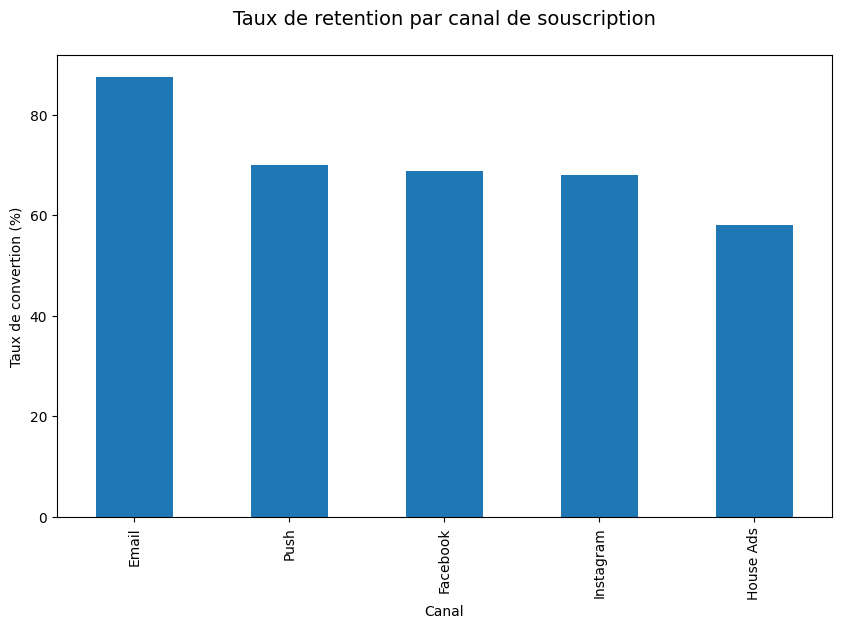

In [14]:
# Visualisation
plt.figure(figsize=(10, 6))
taux_retention_per_canal.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de retention par canal de souscription\n", fontsize=14)

plt.xlabel('Canal')

plt.ylabel('Taux de convertion (%)')

plt.show()


# AUTOMATISATION DU CALCUL DE TAUX DE RETENTION

### Creation de la fonction

In [15]:
# Fonction de calcul du taux de retention 
def retention_rate(dataframe, column_names):
    retained = dataframe[dataframe['is_retained']==True].groupby(column_names)['user_id'].nunique()
    converted = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate
# Appel de la fonction retention_rate
retention_rate(marketing_df, ['subscribing_channel'])


    

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

In [16]:
# Taux de retentio par langue affichee
taux_retention_par_langue = retention_rate(marketing_df, ['language_displayed'])

taux_retention_par_langue

language_displayed
Arabic     0.750000
English    0.668467
German     0.773585
Spanish    1.000000
Name: user_id, dtype: float64

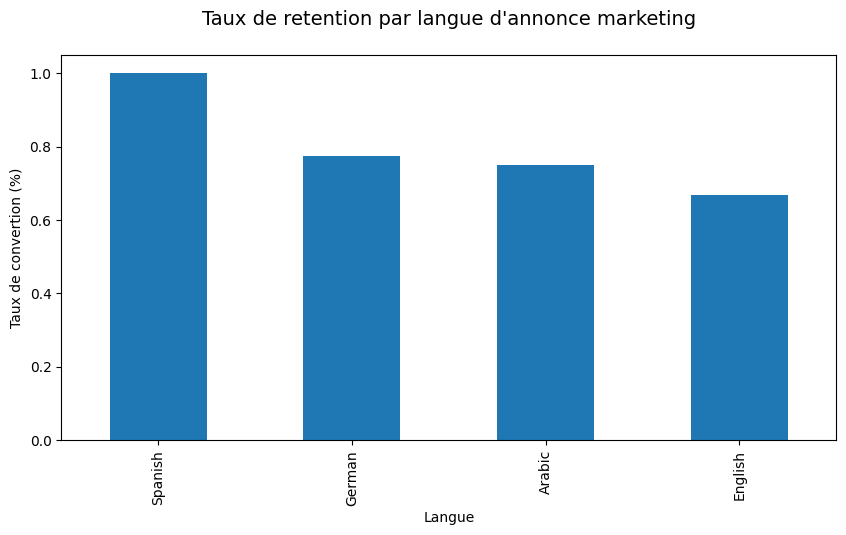

In [45]:
# Visualisation des resultats
plt.figure(figsize=(10, 5))

taux_retention_par_langue.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de retention par langue d'annonce marketing\n", fontsize=14)

plt.xlabel('Langue')

plt.ylabel('Taux de convertion (%)')

plt.show()

# TAUX DE CONVERTION PAR CANAL D'AQUISITION

In [46]:
# Nombre d'utilisateurs uniques ayant souscrit au service
n_souscripteurs_par_canal = marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()

#Nombre total de personnes atteintes par la campagne pour chaque canal
total_per_canal = marketing_df.groupby('subscribing_channel')['user_id'].nunique()

taux_conv_par_canal = (n_souscripteurs_par_canal/total_per_canal) * 100

taux_conv_par_canal.sort_values(ascending=False)


subscribing_channel
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Email         83.854167
Name: user_id, dtype: float64

# AUTOMATISATION DU CALCUL DU TAUX DE CONVERSION

In [20]:
# Definition d'une fonction de calcul du taux de convertion
def convertion_rate(dataframe, column_names):
    # Nombres total d'utilisateurs convertis
    column_conv = marketing_df[marketing_df['converted']==True].groupby(column_names)['user_id'].nunique()

    # Nombre total d'utilisateurs
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Taux de convertion
    convertion_rate = column_conv/column_total

    #Remplacement des valeurs manquantes par 0
    convertion_rate = convertion_rate.fillna(0)

    return convertion_rate

# Verification de la fonction
convertion_rate(marketing_df, ['subscribing_channel']) 



subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

# TAUX DE CONVERSION PAR LANGUE D'ANNONCE

In [22]:
# Calcul du taux de conversion pour chacune des langue d'annonce
taux_conv_par_langue = convertion_rate(marketing_df, ['language_displayed'])
print(taux_conv_par_langue)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


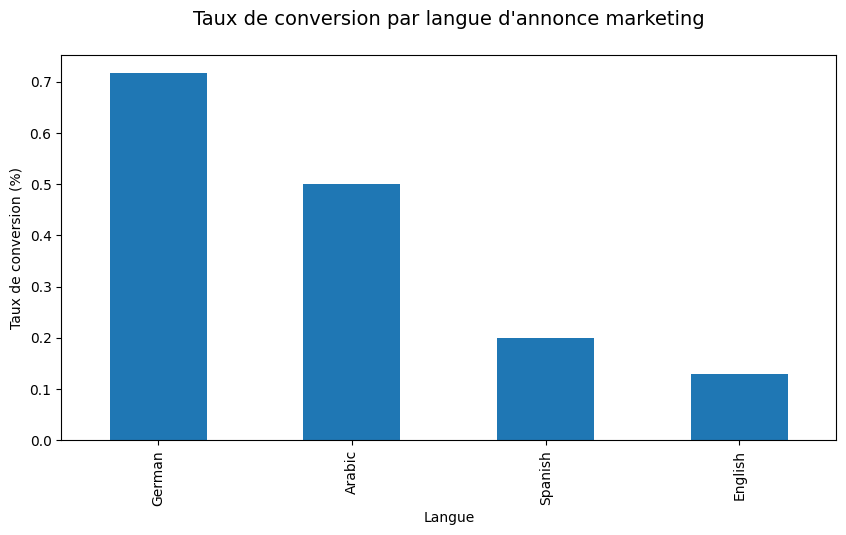

In [23]:
# visualisation des resultats
plt.figure(figsize=(10,5))

taux_conv_par_langue.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de conversion par langue d'annonce marketing\n", fontsize=14)

plt.xlabel('Langue')

plt.ylabel('Taux de conversion (%)')

plt.show()

##### A l'issue de cette analyse du taux de conversion par langue d'annonnce, L'Allamand offre le meilleur taux de conversion(environ 72%) et un taux de retention de 77%. 

##### Nous avons vu par la suite que L'Espagnol a le meilleur taux de retention(100%). Ici, on voit que pour les annonces, cette langue present un taux de conversion de 20% 

##### Les campagnes marketing en Allemand semblent etre plus efficace que celles dans les autres langues en termes de conversion des utilisateurs

# TAUX DE CONVERSION JOUNALIER

In [24]:
# T calcul du taux de converion jounalier
taux_conv_journalier = convertion_rate(marketing_df, ['date_served'])

print(taux_conv_journalier)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


In [25]:
# Transformation du resultat en dataframe
taux_conv_journalier = pd.DataFrame(taux_conv_journalier.reset_index())

taux_conv_journalier.columns = ['date_subscribed', 'convertion_rate']

taux_conv_journalier.head()

,date_subscribed,convertion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


# TAUX DE CONVERSION JOURNALIER PAR GROUPES D'AGES

In [26]:
# En fonction de plusieurs variables
daily_conv_rate_age_group = convertion_rate(marketing_df, ['date_served', 'age_group'])

print(daily_conv_rate_age_group)


date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


In [27]:
# Transformation du resultat en dataFrame
daily_conv_rate_age_group = pd.DataFrame(daily_conv_rate_age_group.unstack(level=1))
# level = 1 car c'est la variable age_group (position 1) qu'on veut desemballer

daily_conv_rate_age_group.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


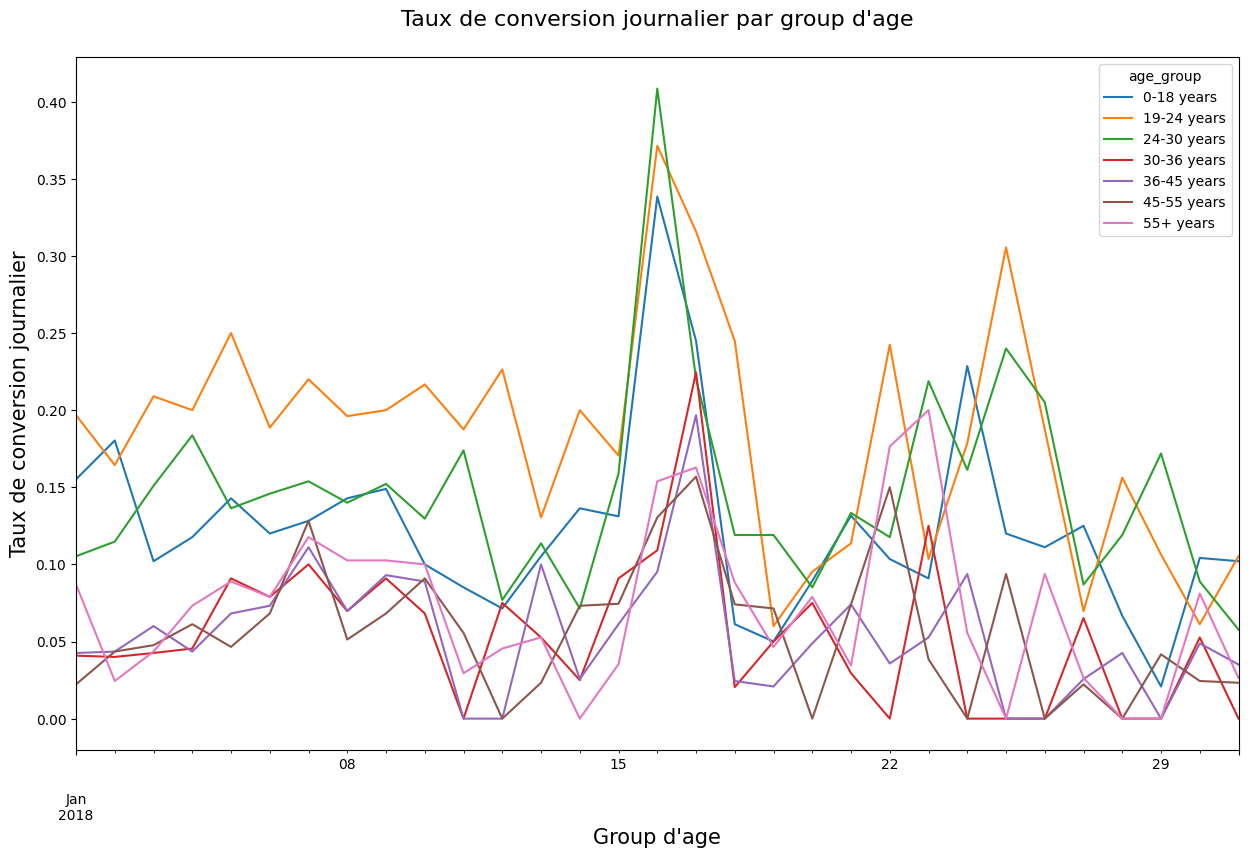

In [35]:
# Visualisation
daily_conv_rate_age_group.plot(kind='line', figsize=(15, 9))

plt.title("Taux de conversion journalier par group d'age\n", size=20, fontsize=16)

plt.ylabel("Taux de conversion journalier", size=15)

plt.xlabel("Group d'age", size=15)

plt.show()

#  TAUX DE CONVERSION JOUNALIER PAR CANAL MARKETING

In [32]:
# taux de conversion journalier par canal marketing
daily_conv_rate_canal = convertion_rate(marketing_df, ['date_served', 'marketing_channel'])

# Transformation du resultat en DataFrame
daily_conv_rate_canal = pd.DataFrame(daily_conv_rate_canal.unstack(level=1))

daily_conv_rate_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.117647,0.084656,0.106667,0.083333
2018-01-02,1.0,0.098361,0.077982,0.129032,0.055556
2018-01-03,0.0,0.080645,0.088542,0.171875,0.083333
2018-01-04,0.5,0.138462,0.089820,0.126984,0.058824
2018-01-05,1.0,0.112903,0.126582,0.159420,0.027778


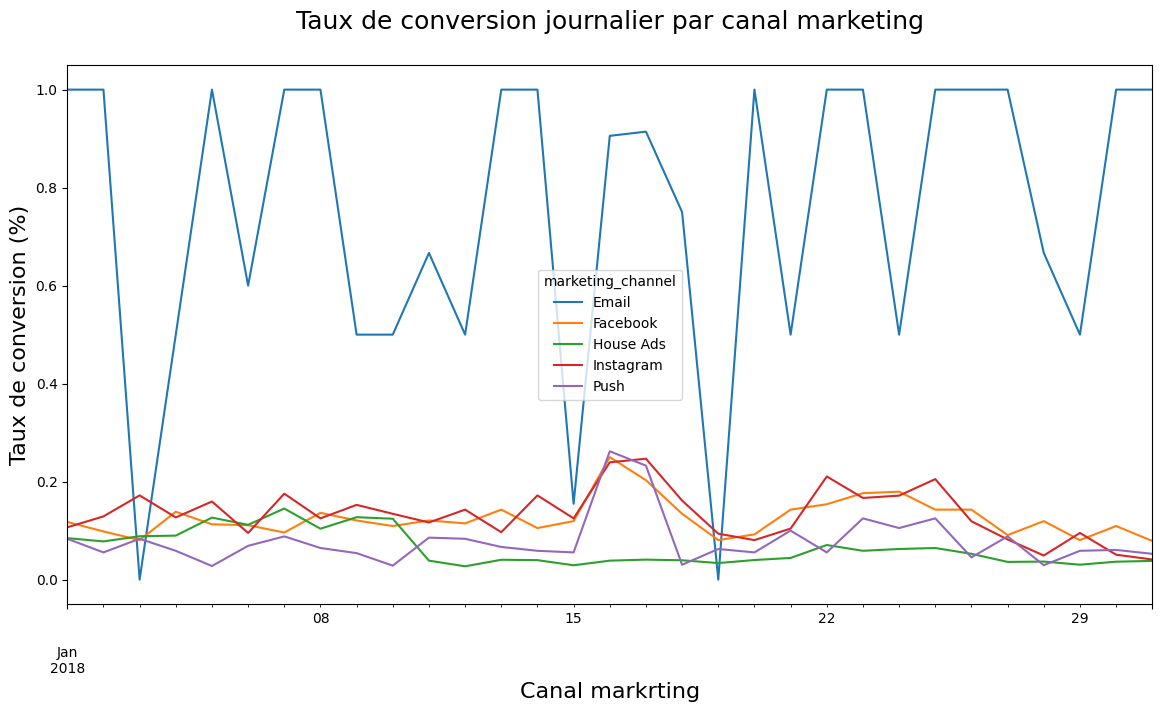

In [34]:
# Visualisation de resultat
daily_conv_rate_canal.plot(kind='line', figsize=(14, 7))

plt.title("Taux de conversion journalier par canal marketing\n", size=20, fontsize=18)

plt.ylabel("Taux de conversion (%)", size=16)

plt.xlabel("Canal markrting", size=16)

plt.show()

# TAUX DE CONVERSION PAR JOUR DE SEMAINE ET PAR CANAL MARKETING

##### Les utilisateurs sont-ils plus susceptibles de se convertir le week-end par rapport aux autres jour de la semaine ?

In [37]:
# Colonne jour de la semaine ou l'annonce a ete diffusee
marketing_df['Dow_served'] = marketing_df['date_served'].dt.dayofweek

# Taux de conversion par jour de la semaine et par canal pmarketing
DoW_conversion = convertion_rate(marketing_df, ['Dow_served', 'marketing_channel'])

DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
Dow_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


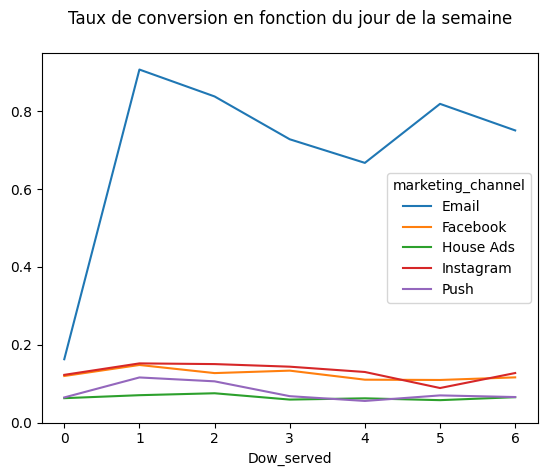

In [38]:
# Visualisation du resultat
# Taux de conversion en fonction du jour de la semaine 
DoW_df.plot()
plt.title('Taux de conversion en fonction du jour de la semaine\n')
plt.ylim(0)
plt.show()


# PREFERENCES JOUNALIERES LINGUISTIQUES DES UTILISATEURS

In [40]:
#Nombres d'utilisateurs pour chaque langues preferee a chaque date
n_lang_per_date = marketing_df.groupby(['date_served', 'language_preferred'])['user_id'].nunique()

print(n_lang_per_date)

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64


In [42]:
# Transformation du resultat en DataFrame
n_lang_per_date = pd.DataFrame(n_lang_per_date.unstack(level=1))
n_lang_per_date.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


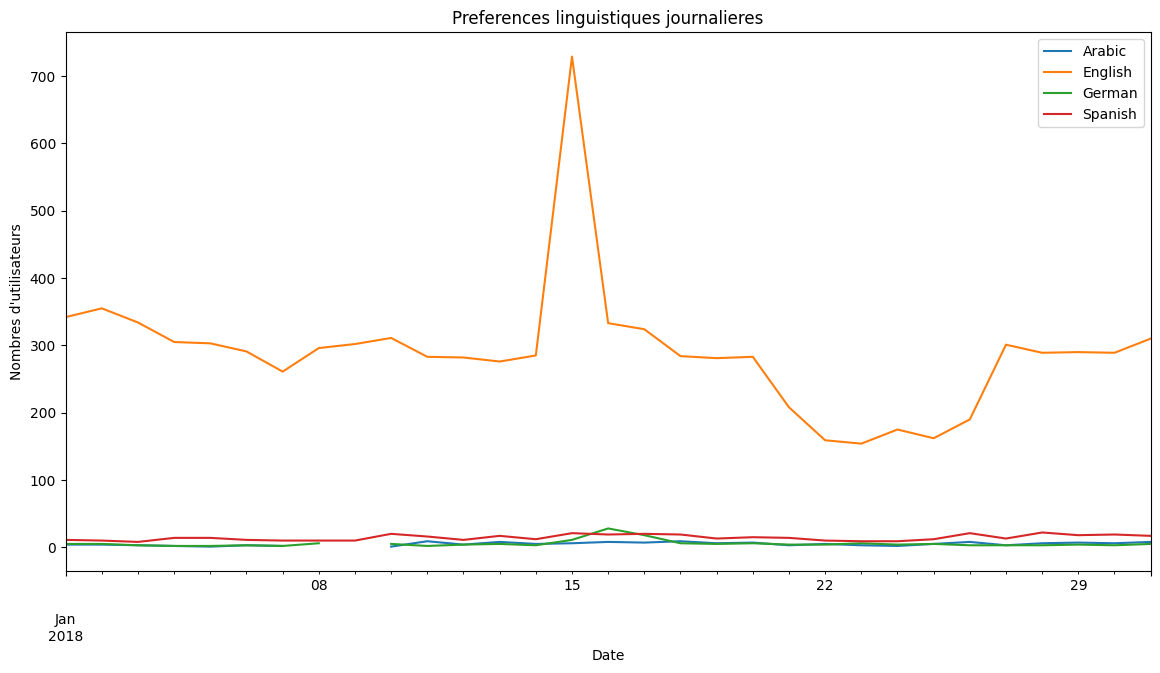

In [43]:
# Visualisation du resltat
n_lang_per_date.plot(figsize=(14, 7))
plt.title('Preferences linguistiques journalieres')
plt.xlabel('Date')
plt.ylabel("Nombres d'utilisateurs")
plt.legend(loc = 'upper right', labels = n_lang_per_date.columns.values)

plt.show()

##### Conclusion: Comme nous l'avons vu precedemment, la langue la plus populaire est de loin l'Anglais

# PREFERENCES LINGUISTIQUES PAR GROUPE D'AGES

In [44]:
#N ombres d'utilisateurs par groupe d'ages et langues preferees
n_lan_per_age = marketing_df.groupby(['age_group', 'language_preferred'])['user_id'].nunique()

#Transformation du resultat en DataFrame
n_lan_per_age = pd.DataFrame(n_lan_per_age.unstack(level=1))

n_lan_per_age.head()



language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39


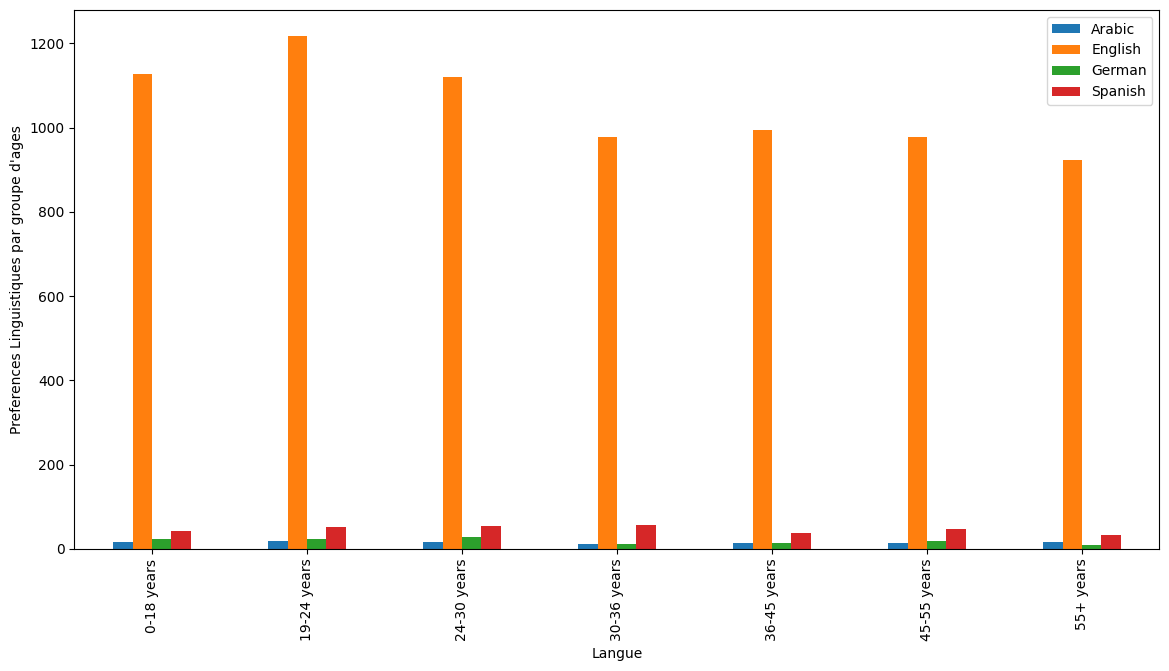

In [48]:
#visualisation du resultat
n_lan_per_age.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Langue')
plt.ylabel("Preferences Linguistiques par groupe d'ages")
plt.legend(loc = 'upper right', labels = n_lan_per_age.columns.values)
plt.show()

##### Conclusion: L'Anglais demeure la langue preferee quel que soit le groupe d'ages

# CANAUX MARKETING SELON LE GROUPE D'AGES

##### Supposons que les decideurs de l'entreprise veulent si les canaux marketing atteignent tous les utilisateurs de maniere egale ou s'il y a une difference.Nous allons donc creer un graphique indiquant le nombre de personnes atteintes par chaque canal marketing par ages

In [46]:
#Nombres d'utilisateurs par groupe d'ages et canal d'acquisition
canal_age = marketing_df.groupby(['age_group', 'marketing_channel'])['user_id'].nunique()

#Transforfation du resultat en DataFrame
canal_age = pd.DataFrame(canal_age.unstack(level=1))

canal_age.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


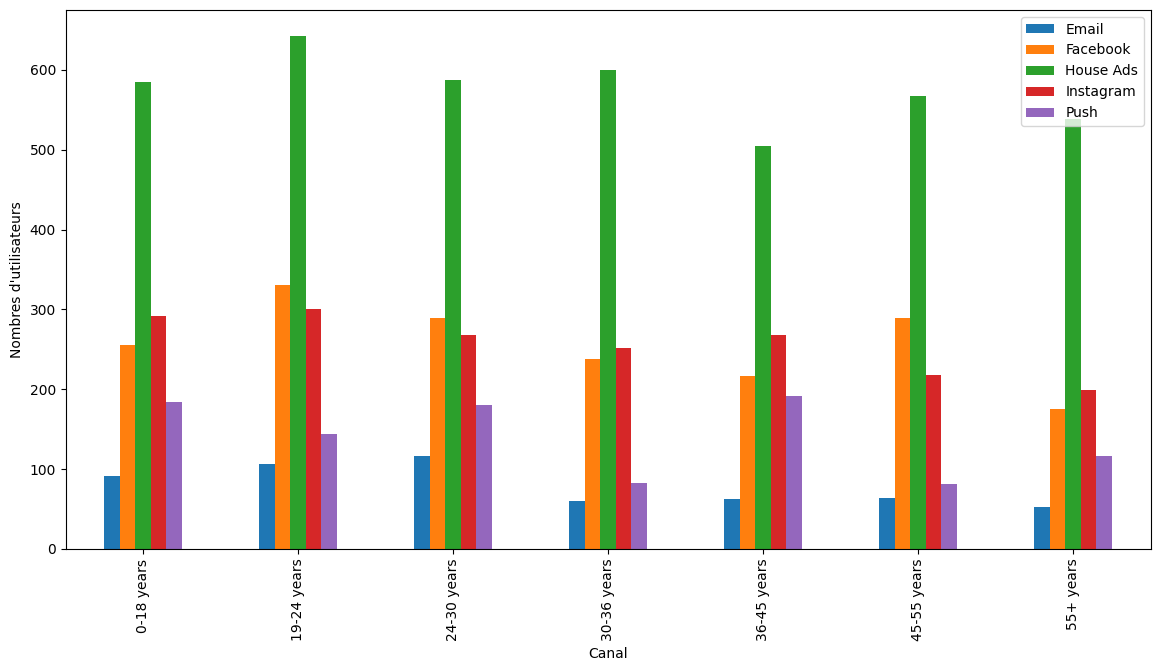

In [47]:
#visualisation du resultat
canal_age.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Canal')
plt.ylabel("Nombres d'utilisateurs")
plt.legend(loc = 'upper right', labels = canal_age.columns.values)

plt.show()

# CONCLUSION
##### Le marketing est des departements les plus importants pour une entreprise. Pouvoir analyser les donnees clients afin d'en tirer des informations utiles est une competence hautement importante. Pandas est une librairie tres puissante pour faire l'analyse des donnees avec python.

##### A travres ce projet, nous avons utilses quelques fonctionnalites de pendas afin d'effectuer une analyse descriptive de la campagne marketing d'une entreprise de service en ligne